In [2]:
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats.contingency import expected_freq, margins

# Discretización

In [3]:
iris_filename = 'datasets-uci-iris.csv'
iris = pd.read_csv(iris_filename, sep=',', decimal='.', 
header = None, names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target'])
sepal = pd.cut(iris['sepal_length'],4)
petal = pd.cut(iris['petal_length'],4)
sepalw = pd.cut(iris['sepal_width'],4)
petalw = pd.cut(iris['petal_width'],4)

In [4]:
print(sepal)

0      (4.296, 5.2]
1      (4.296, 5.2]
2      (4.296, 5.2]
3      (4.296, 5.2]
4      (4.296, 5.2]
           ...     
145      (6.1, 7.0]
146      (6.1, 7.0]
147      (6.1, 7.0]
148      (6.1, 7.0]
149      (5.2, 6.1]
Name: sepal_length, Length: 150, dtype: category
Categories (4, interval[float64, right]): [(4.296, 5.2] < (5.2, 6.1] < (6.1, 7.0] < (7.0, 7.9]]


# Tabla contingencia

In [5]:
# Tabla de contingencia
print("Tabla contingencia\n")
tcon = pd.crosstab(petal,sepal)
print(tcon)


Tabla contingencia

sepal_length    (4.296, 5.2]  (5.2, 6.1]  (6.1, 7.0]  (7.0, 7.9]
petal_length                                                    
(0.994, 2.475]            39          11           0           0
(2.475, 3.95]              5           6           0           0
(3.95, 5.425]              1          32          28           0
(5.425, 6.9]               0           1          15          12


# Independencia

In [6]:
print("\nFrecuencias esperadas\n")
print(expected_freq(tcon))



Frecuencias esperadas

[[15.         16.66666667 14.33333333  4.        ]
 [ 3.3         3.66666667  3.15333333  0.88      ]
 [18.3        20.33333333 17.48666667  4.88      ]
 [ 8.4         9.33333333  8.02666667  2.24      ]]


- La hipótesis nula es "las variables son independientes"
- Un p-valor bajo significa que se rechaza la hipótesis nula (el p-valor es la probabilidad de observar el resultado, si la hipótesis nula fuese cierta)

In [7]:
print("\ntest chi 2\n")
result = chi2_contingency(tcon)
print(result)



test chi 2

Chi2ContingencyResult(statistic=np.float64(163.72781790455065), pvalue=np.float64(1.2470123822677767e-30), dof=9, expected_freq=array([[15.        , 16.66666667, 14.33333333,  4.        ],
       [ 3.3       ,  3.66666667,  3.15333333,  0.88      ],
       [18.3       , 20.33333333, 17.48666667,  4.88      ],
       [ 8.4       ,  9.33333333,  8.02666667,  2.24      ]]))


- El p-valor es muy bajo, rechazamos que sean independientes

In [8]:
print("\nMarginales\n")
print(margins(tcon))
print("\nMarginales esperadas\n")
print(margins(expected_freq(tcon)))


Marginales

[array([[50],
       [11],
       [61],
       [28]]), array([[45, 50, 43, 12]])]

Marginales esperadas

[array([[50.],
       [11.],
       [61.],
       [28.]]), array([[45., 50., 43., 12.]])]


# Normalización

In [9]:
# Ejemplo preprocesado 1
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -1.,  2.],
               [ 2.,  0.,  0.],
               [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X)
print("Estandarizado (version 1)\n")
print(X_scaled)


Estandarizado (version 1)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [10]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[0. 0. 0.]
[1. 1. 1.]


In [11]:
# Ejemplo preprocesado 2
scaler = preprocessing.StandardScaler().fit(X)
print("Estandarizado\n")
print(scaler.mean_)
print(scaler.scale_)
print(scaler.transform(X))


Estandarizado

[1.         0.         0.33333333]
[0.81649658 0.81649658 1.24721913]
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [12]:
print(scaler.transform(X).mean(axis=0))
print(scaler.transform(X).std(axis=0))

[0. 0. 0.]
[1. 1. 1.]


In [13]:
# Ejemplo preprocesado 3
X_train = np.array([[ 1., -1.,  2.],
                     [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])
print("Escalado min/max\n")
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
print(X_train_minmax)

Escalado min/max

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


In [14]:
# Ejemplo preprocesado 4
X_train = np.array([[ 1., -1.,  2.],
                   [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
print("Escalado max abs\n")
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
print(X_train_maxabs) 

Escalado max abs

[[ 0.5 -1.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -0.5]]


In [15]:
print("Escalado de un conjunto de test con max abs")
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
print(X_test_maxabs)

Escalado de un conjunto de test con max abs
[[-1.5 -1.   2. ]]


# Transformaciones del histograma

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform,norm
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

In [17]:
X = uniform.rvs(loc=0,scale=1,size=1000).reshape(-1,1)

def bc(x,l=0):
	return np.vectorize(lambda t:(t**l-1)/l if l!=0 else np.log(t))(x)

def rango(x):
	return np.argsort(x,axis=0)

def rng(x):
	m = x.shape[0]
	return np.vectorize(lambda x : norm.ppf((x-3.0/8.0)/(m+0.25)))(rango(x))

In [18]:
# Transformación Box-Cox
transformerBC = FunctionTransformer(bc)
# Transformación de rango
transformerRN = FunctionTransformer(rng)
XBC = transformerBC.transform(X)
XRN = transformerRN.transform(X)

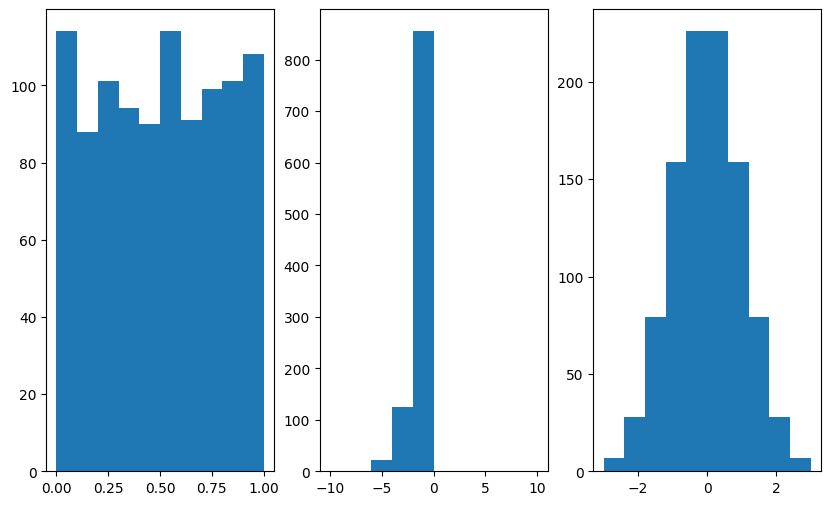

In [19]:
plt.figure(figsize=(10,6))
plt.subplot(131); plt.hist(X,range=(0,1))
plt.subplot(132); plt.hist(XBC,range=(-10,10))
plt.subplot(133); plt.hist(XRN,range=(-3,3))
plt.show()

# Transformaciones polinómicas

In [20]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
X = np.arange(6).reshape(3, 2)
print(X)


[[0 1]
 [2 3]
 [4 5]]


In [21]:
# Todos los terminos
poly = PolynomialFeatures(2)
print(poly.fit_transform(X))
# Solo productos
poly = PolynomialFeatures(3,interaction_only=True)
print(poly.fit_transform(X))

[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
[[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]


In [22]:
# A la medida
transformer = FunctionTransformer(np.log1p)
print(transformer.transform(X))

[[0.         0.69314718]
 [1.09861229 1.38629436]
 [1.60943791 1.79175947]]


In [23]:
# Imputación

In [24]:
COLS_X = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
]
COL_Y = "MEDV"


def read_boston_statlib(path_or_url: str):
    """
    Lee el fichero 'boston' de StatLib (formato 2 líneas/registro) y devuelve:
    X : DataFrame (13 features)
    y : Series (MEDV)
    df: DataFrame completo (features + target)
    """
    # Lee todas las líneas de datos, omitiendo el encabezado largo del archivo
    raw = pd.read_csv(
        path_or_url, sep=r"\s+", header=None, skiprows=22, engine="python"
    )

    # Even rows (0,2,4,...) contienen 11 columnas: CRIM..PTRATIO
    even = raw.iloc[::2, :11].reset_index(drop=True)

    # Odd rows (1,3,5,...) contienen 3 columnas: B, LSTAT, MEDV
    odd = raw.iloc[1::2, :3].reset_index(drop=True)

    # Ensambla las 13 features y la etiqueta
    X = pd.concat([even, odd.iloc[:, :2]], axis=1)
    X.columns = COLS_X
    y = odd.iloc[:, 2].rename(COL_Y)

    df = X.copy()
    df[COL_Y] = y
    return X, y, df


In [25]:
"""
======================================================
Imputacion de valores perdidos en el preprocesamiento
======================================================

Comparacion de diferentes metodos de imputacion

"""
import numpy as np

# from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

rng = np.random.RandomState(0)

# dataset = load_boston()
# X_full, y_full = dataset.data, dataset.target
data_url = "http://lib.stat.cmu.edu/datasets/boston"
X, y, raw_df = read_boston_statlib(data_url)
X_full = X.values
y_full = y.values

n_samples = X_full.shape[0]
n_features = X_full.shape[1]

In [26]:
# Estimacion del R2 con validacion cruzada para Random Forest
# para el dataset completo
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_full, y_full,cv=5).mean()
print("R2 del dataset completo = %.2f" % score)



R2 del dataset completo = 0.61


In [27]:
raw_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [28]:
def inject_mnar_all_quantile(
    X_full, missing_rate_per_col=0.3, random_state=0, df_like=None
):
    """
    MNAR determinista por cuantil en TODAS las columnas.
    - missing_rate_per_col: fracción de filas con NaN por columna.
    - df_like: opcional, un DataFrame 'gemelo' para reflejar los mismos NaN.
    Devuelve: X_with_nan (numpy), df_with_nan (DataFrame o None)
    """
    rng = np.random.RandomState(random_state)
    X = np.asarray(X_full, dtype=float).copy()
    n_samples, n_features = X.shape
    df_with_nan = None if df_like is None else df_like.astype(float).copy()

    for j in range(n_features):
        # cuántos NaN queremos en esta columna
        k = int(np.floor(missing_rate_per_col * n_samples))
        if k < 1:
            k = 1  # garantiza al menos 1 NaN por columna

        col = X[:, j]
        # elige aleatoriamente si "falta cuando es alto" o "falta cuando es bajo"
        high_tail = bool(rng.randint(0, 2))

        if high_tail:
            thresh = np.nanpercentile(col, 100 * (1 - missing_rate_per_col))
            candidates = np.where(col >= thresh)[0]
        else:
            thresh = np.nanpercentile(col, 100 * (missing_rate_per_col))
            candidates = np.where(col <= thresh)[0]

        # ajusta a exactamente k (downsample/upsample si hace falta)
        if len(candidates) >= k:
            row_idx = rng.choice(candidates, size=k, replace=False)
        else:
            # si hay menos candidatos (columna con muchos empates, etc.), completa al azar
            extra = rng.choice(
                np.setdiff1d(np.arange(n_samples), candidates),
                size=k - len(candidates),
                replace=False,
            )
            row_idx = np.r_[candidates, extra]

        # aplica NaN
        X[row_idx, j] = np.nan
        if df_with_nan is not None:
            df_with_nan.iloc[row_idx, j] = np.nan

    return X, df_with_nan


In [29]:

missing_rate = 0.25
n_missing_samples = int(np.floor(n_samples * missing_rate))
MAR = False
if MAR:
    mask = (
        rng.rand(
            n_samples,
            n_features
        )
        < missing_rate
    )  # MCAR ~binomial
    X_with_nan = X_full.astype(float).copy()
    X_with_nan[mask] = np.nan
    df_with_nan = raw_df.astype(float).copy()
    df_with_nan.values[:,:-1][mask] = np.nan
else:
    X_with_nan, df_with_nan = inject_mnar_all_quantile(
        X_full, missing_rate_per_col=missing_rate, random_state=42, df_like=raw_df
    )



<Axes: >

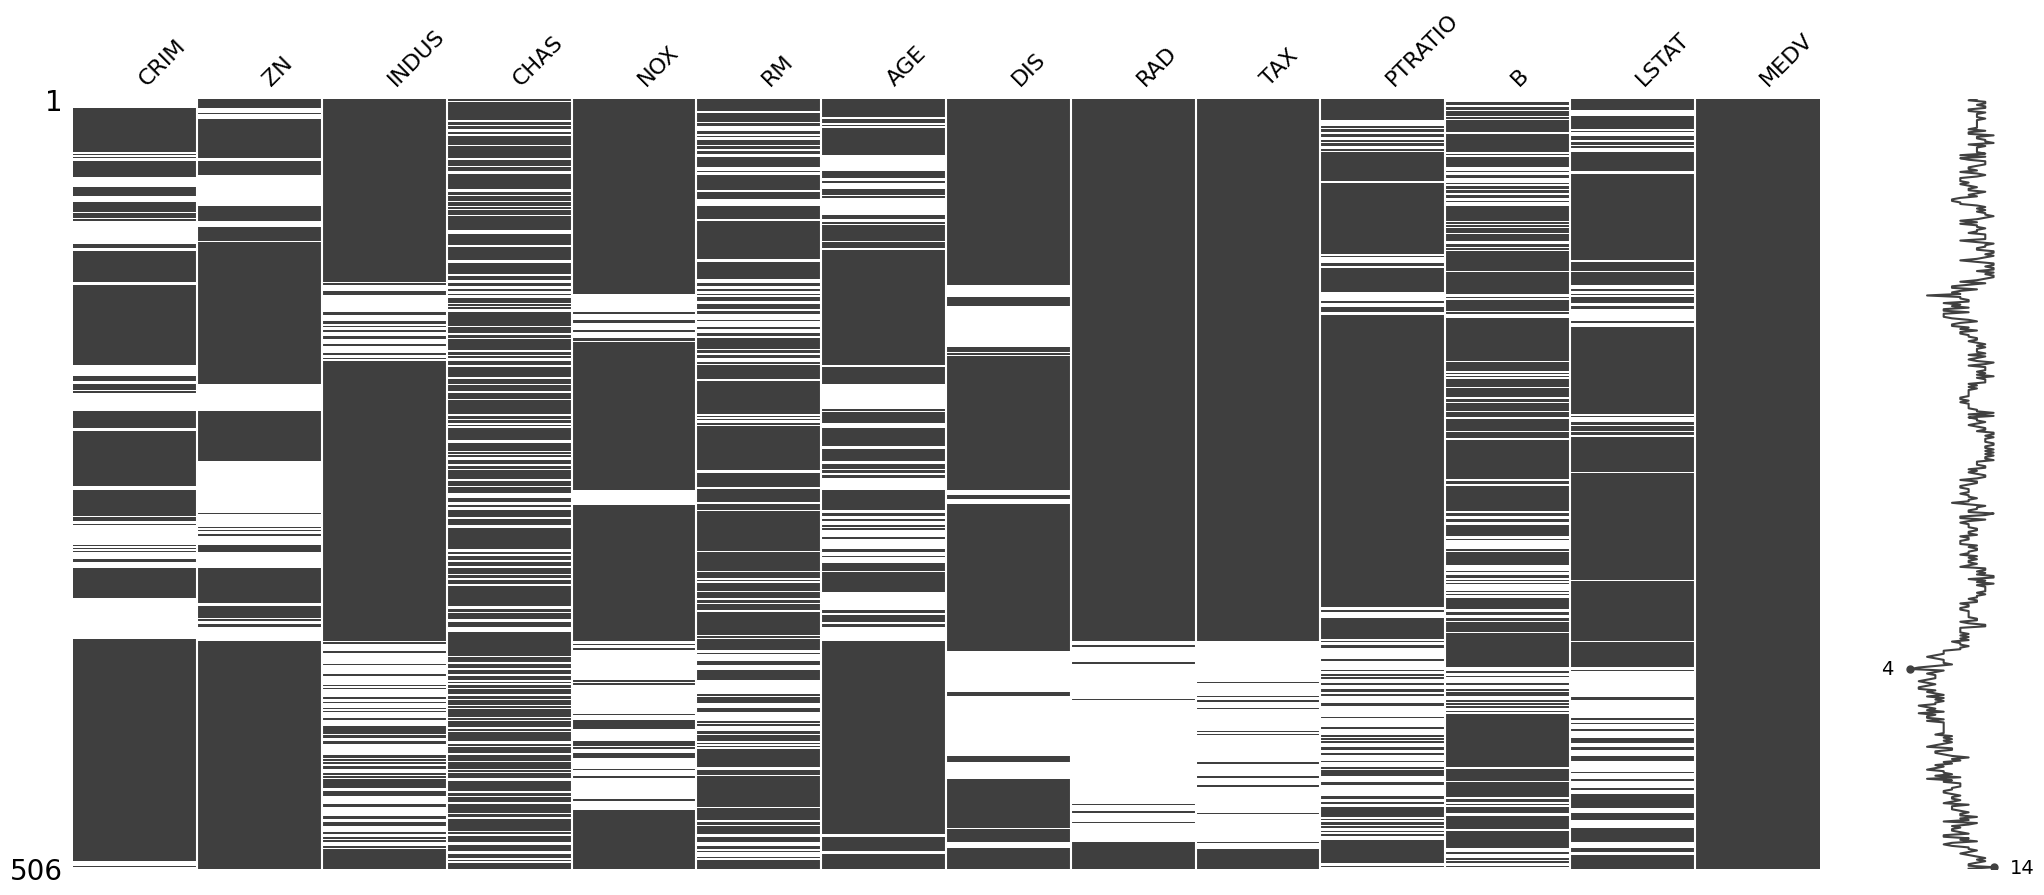

In [30]:
# ! uv pip install missingno
import missingno as msno

msno.matrix(df_with_nan)


<Axes: >

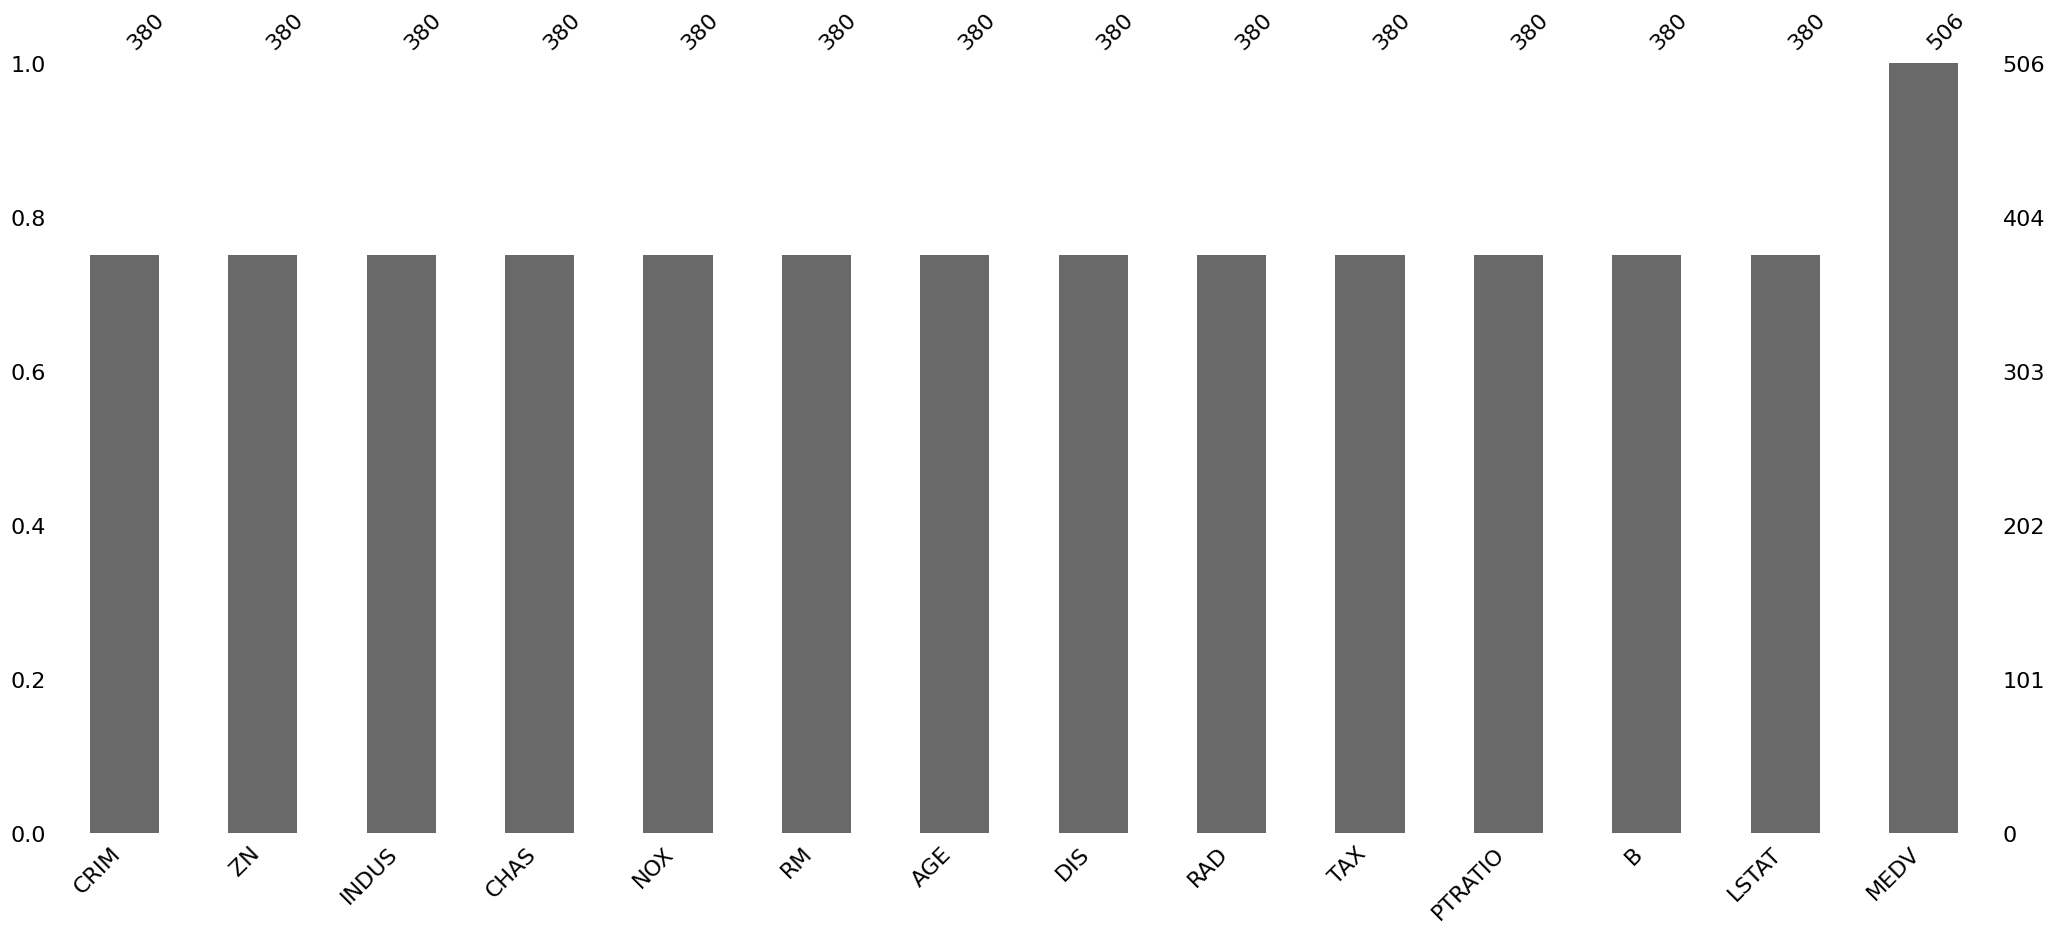

In [31]:
msno.bar(df_with_nan)


<Axes: >

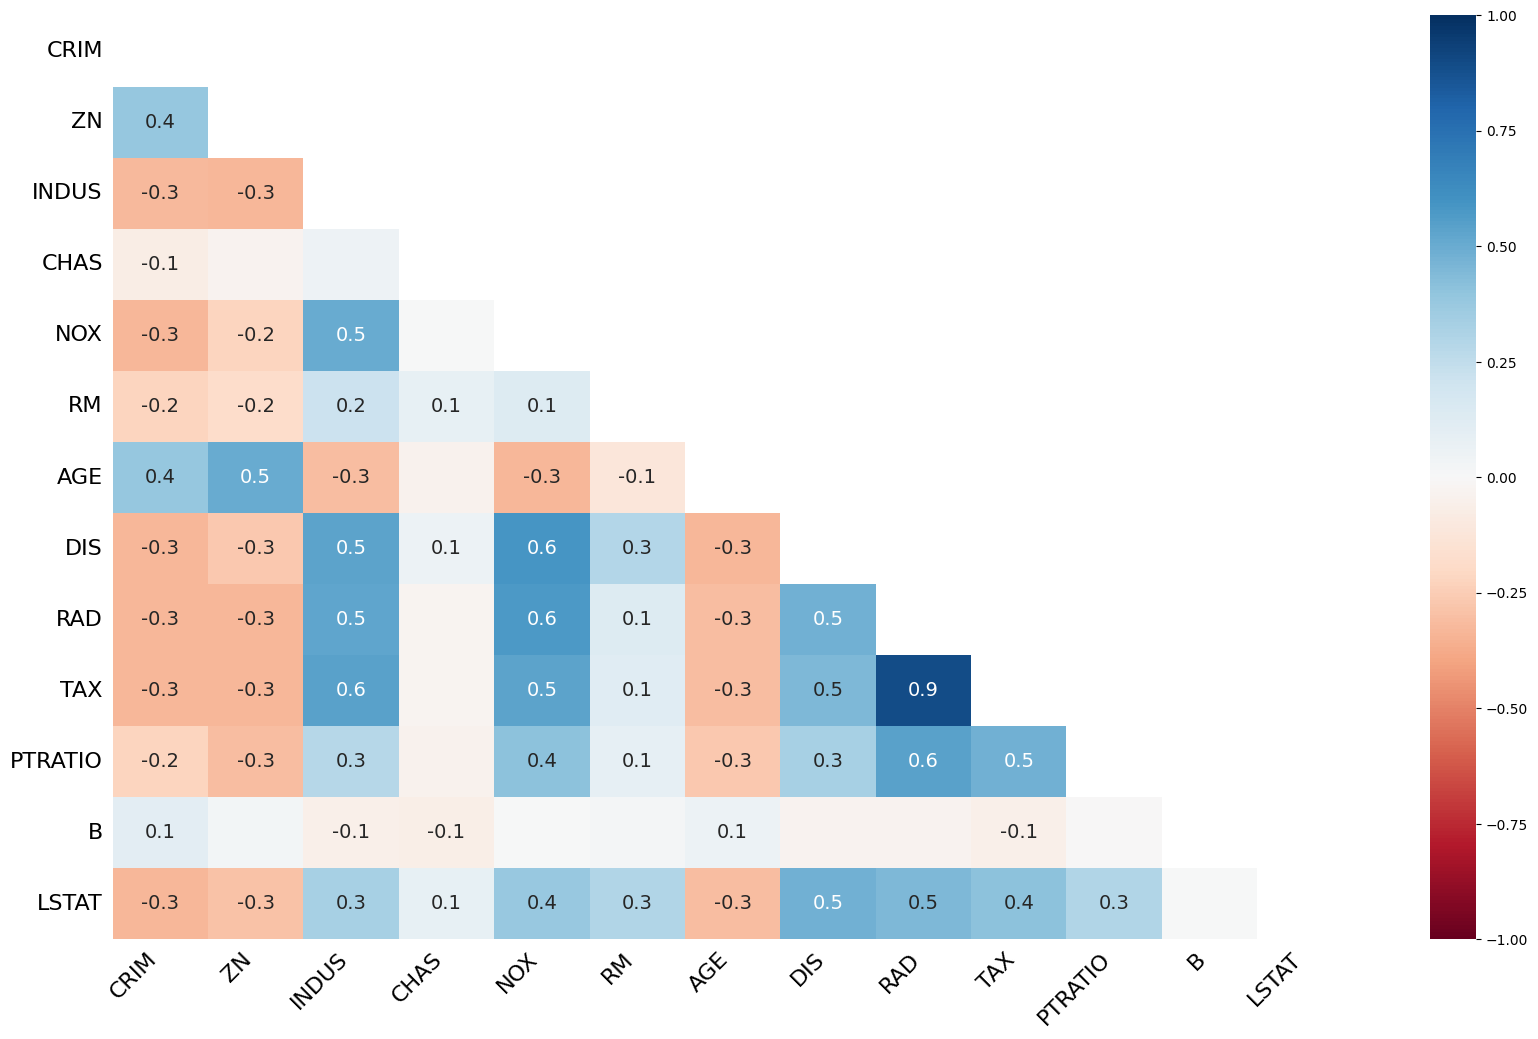

In [32]:
msno.heatmap(df_with_nan)

<Axes: >

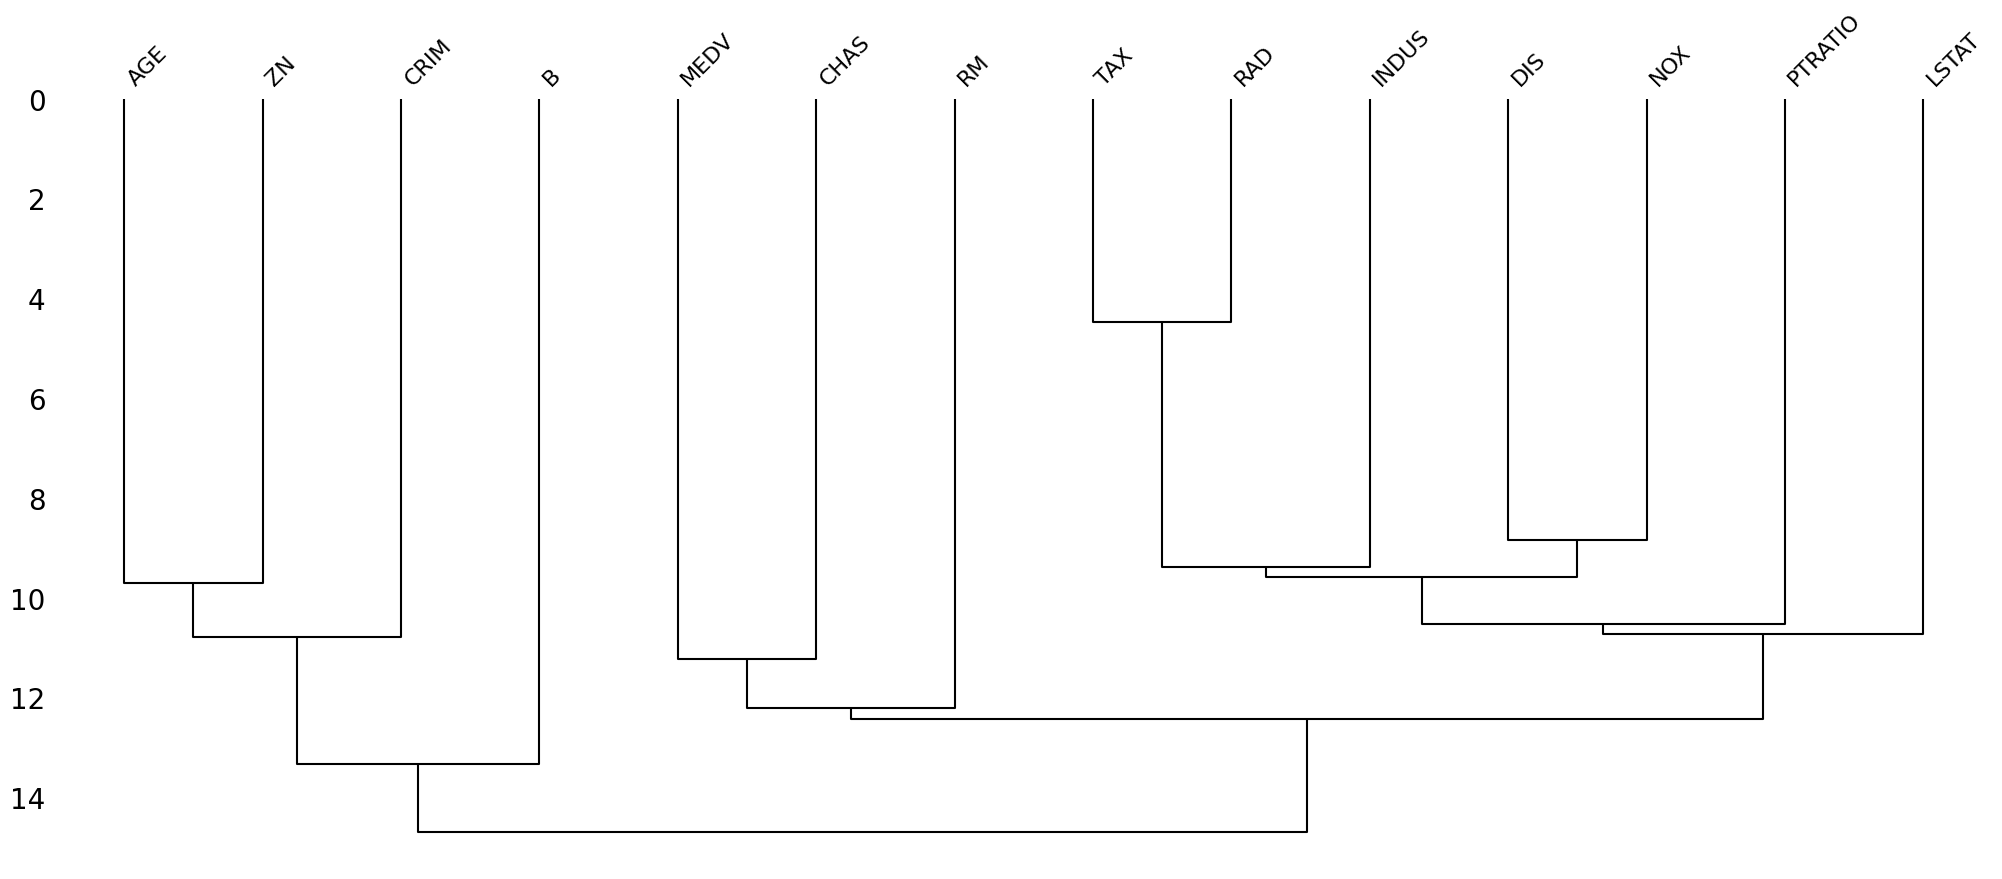

In [33]:
msno.dendrogram(df_with_nan)

In [34]:
# Estimacion del error eliminando todas las instancias que tengan valores perdidos
missing_samples = df_with_nan.isna().any(axis=1).to_numpy()
X_filtered = X_full[~missing_samples, :]
y_filtered = y_full[~missing_samples]
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_filtered, y_filtered,cv=5).mean()
print("R2 del dataset con valores perdidos = %.2f" % score)

R2 del dataset con valores perdidos = -0.25


In [35]:
df_zero = df_with_nan.fillna(0.0)  # pone 0 sólo donde había NaN
X_missing = df_zero.to_numpy(dtype=float)[:,:-1]
y_missing = df_zero.to_numpy(dtype=float)[:,-1]
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_missing, y_missing, cv=5).mean()
print("R2 del dataset con valores perdidos, imputacion a 0= %.2f" % score)

R2 del dataset con valores perdidos, imputacion a 0= 0.48


In [36]:
# Se reemplazan los ceros por la media de la columna
estimator = Pipeline([("imputer", SimpleImputer(missing_values=np.nan,
                                          strategy="mean")),
                      ("forest", RandomForestRegressor(random_state=0,
                                                       n_estimators=100))])
score = cross_val_score(estimator, X_with_nan, y_full,cv=5).mean()
print("R2 del dataset con valores perdidos, imputacion con la media = %.2f" % score)

R2 del dataset con valores perdidos, imputacion con la media = 0.32


In [37]:
# Se reemplazan los ceros por la mediana de la columna
estimator = Pipeline([("imputer", SimpleImputer(missing_values=np.nan,
                                          strategy="median")),
                      ("forest", RandomForestRegressor(random_state=0,
                                                       n_estimators=100))])
score = cross_val_score(estimator, X_with_nan, y_missing,cv=5).mean()
print("R2 del dataset con valores perdidos, imputacion con la mediana = %.2f" % score)

R2 del dataset con valores perdidos, imputacion con la mediana = 0.37


# Imputación avanzada

In [38]:
# ! uv pip install fancyimpute

In [39]:
from fancyimpute import KNN, IterativeSVD, SoftImpute


KNN

In [40]:
# Imputacion KNN
X_filled_knn = KNN(k=2).fit_transform(X_with_nan)
score = cross_val_score(estimator, X_filled_knn, y_full, cv=5).mean()
print("R2 del dataset con valores perdidos, imputacion KNN= %.2f" % score)

Imputing row 1/506 with 2 missing, elapsed time: 0.028
Imputing row 101/506 with 0 missing, elapsed time: 0.029
Imputing row 201/506 with 3 missing, elapsed time: 0.031
Imputing row 301/506 with 2 missing, elapsed time: 0.032
Imputing row 401/506 with 7 missing, elapsed time: 0.034
Imputing row 501/506 with 1 missing, elapsed time: 0.036
R2 del dataset con valores perdidos, imputacion KNN= 0.41


In [41]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(
    n_neighbors=2,  
    metric="nan_euclidean"
)

X_filled_knn = imputer.fit_transform(X_with_nan)
score = cross_val_score(estimator, X_filled_knn, y_full, cv=5).mean()
print("R2 del dataset con valores perdidos, imputacion KNN= %.2f" % score)


R2 del dataset con valores perdidos, imputacion KNN= 0.42


In [42]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(
    n_neighbors=2,  
    weights="distance",  # <-- esto lo convierte en WKNNI
    metric="nan_euclidean"  
)

X_filled_knn = imputer.fit_transform(X_with_nan)
score = cross_val_score(estimator, X_filled_knn, y_full, cv=5).mean()
print("R2 del dataset con valores perdidos, imputacion WKNNI= %.2f" % score)


R2 del dataset con valores perdidos, imputacion WKNNI= 0.43


In [43]:
# Escalado z-score ignorando NaN
mu = np.nanmean(X_with_nan, axis=0)
sigma = np.nanstd(X_with_nan, axis=0)
sigma[sigma == 0] = 1.0  # evita división por 0
Z = (X - mu) / sigma

# WKNNI en el espacio estandarizado
imputer = KNNImputer(n_neighbors=7, weights="distance", metric="nan_euclidean")
Z_filled = imputer.fit_transform(Z)

# Des-escalar para volver a la unidad original
X_filled_knn = Z_filled * sigma + mu
score = cross_val_score(estimator, X_filled_knn, y_full, cv=5).mean()
print("R2 del dataset con valores perdidos, imputacion WKNNI estandarizada= %.2f" % score)


R2 del dataset con valores perdidos, imputacion WKNNI estandarizada= 0.61


KMEANS

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Pipeline básico: imputación inicial + escalado + clustering
imp0 = SimpleImputer(strategy="median")  # arranque para poder clusterizar
X0 = imp0.fit_transform(X_with_nan)
Z = StandardScaler().fit_transform(X0)

k = 8
labels = KMeans(n_clusters=k, n_init="auto", random_state=0).fit_predict(Z)

# Imputación KMI: valores del centroide (en el espacio original)
centroids = np.vstack([X0[labels == i].mean(axis=0) for i in range(k)])
X_kmi = X_with_nan.copy()
for i in range(X_kmi.shape[0]):
    miss = np.isnan(X_kmi[i])
    if miss.any():
        X_kmi[i, miss] = centroids[labels[i], miss]
score = cross_val_score(estimator, X_kmi, y_full, cv=5).mean()
print(
    "R2, imputacion KMI= %.2f" % score
)


R2, imputacion KMI= 0.48


SVM (o otro método de regresión)

In [45]:
import numpy as np
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X_svmi = X_with_nan.astype(float).copy()
n, p = X_svmi.shape
cols = np.arange(p)

for j in range(p):
    mask_nan = np.isnan(X_svmi[:, j])
    if not mask_nan.any():
        continue

    # Filas con y_j observado y sin NaN en y_j
    rows_fit = ~mask_nan
    if rows_fit.sum() < 10:
        continue  # demasiado poco dato completo para entrenar

    # Features = todas menos j
    feat_mask = cols != j
    X_train_raw = X_svmi[rows_fit][:, feat_mask]
    y_train = X_svmi[rows_fit, j]
    X_pred_raw = X_svmi[mask_nan][:, feat_mask]

    # Imputación SOLO de features (no del target)
    imp = SimpleImputer(strategy="median")
    X_train_imp = imp.fit_transform(X_train_raw)
    X_pred_imp = imp.transform(X_pred_raw)

    # Escalado (opcional pero recomendable para SVR)
    scaler = StandardScaler()
    X_train_imp = scaler.fit_transform(X_train_imp)
    X_pred_imp = scaler.transform(X_pred_imp)

    # SVR y predicción
    model = SVR(kernel="rbf", C=10, epsilon=0.1, gamma="scale")
    model.fit(X_train_imp, y_train)
    X_svmi[mask_nan, j] = model.predict(X_pred_imp)
score = cross_val_score(estimator, X_svmi, y_full, cv=5).mean()
print("R2, imputacion SVMI= %.2f" % score)

R2, imputacion SVMI= 0.44


In [46]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor

X_svmi = X_with_nan.astype(float).copy()
n, p = X_svmi.shape
cols = np.arange(p)

for j in range(p):
    mask_nan = np.isnan(X_svmi[:, j])
    if not mask_nan.any():
        continue
    rows_fit = ~mask_nan
    if rows_fit.sum() < 10:
        continue

    feat_mask = cols != j
    X_train = X_svmi[rows_fit][:, feat_mask]  # puede contener NaN
    y_train = X_svmi[rows_fit, j]
    X_pred = X_svmi[mask_nan][:, feat_mask]  # puede contener NaN

    model = HistGradientBoostingRegressor(random_state=0)
    model.fit(X_train, y_train)
    X_svmi[mask_nan, j] = model.predict(X_pred)
score = cross_val_score(estimator, X_svmi, y_full, cv=5).mean()
print("R2, imputacion SVMI= %.2f" % score)

/Users/lucianosanchez/dataenv3.12/lib/python3.12/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


R2, imputacion SVMI= 0.56


In [47]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.svm import SVR

imp = IterativeImputer(
    estimator=SVR(kernel="rbf", C=10, epsilon=0.1, gamma="scale"),
    initial_strategy="median",
    max_iter=10,
    random_state=0,
)
X_svmi = imp.fit_transform(X_with_nan)
score = cross_val_score(estimator, X_svmi, y_full, cv=5).mean()
print("R2, imputacion SVMI= %.2f" % score)

R2, imputacion SVMI= 0.32


SVD

In [48]:
# Imputacion IterativeSVD
X_filled_svd = IterativeSVD().fit_transform(X_with_nan)
score = cross_val_score(estimator, X_filled_svd, y_full, cv=5).mean()
print("R2 del dataset con valores perdidos, imputacion IterativeSVD= %.2f" % score)

[IterativeSVD] Iter 1: observed MAE=16.140134
[IterativeSVD] Iter 2: observed MAE=4.399789
[IterativeSVD] Iter 3: observed MAE=1.415299
[IterativeSVD] Iter 4: observed MAE=0.385188
[IterativeSVD] Iter 5: observed MAE=0.103886
R2 del dataset con valores perdidos, imputacion IterativeSVD= 0.29


In [49]:
# Imputacion SoftImpute
X_filled_si = SoftImpute().fit_transform(X_with_nan)
score = cross_val_score(estimator, X_filled_si, y_full, cv=5).mean()
print("R2 del dataset con valores perdidos, imputacion Soft Impute= %.2f" % score)

[SoftImpute] Max Singular Value of X_init = 8967.494602
[SoftImpute] Iter 1: observed MAE=3.713822 rank=4
[SoftImpute] Iter 2: observed MAE=3.607175 rank=3
[SoftImpute] Iter 3: observed MAE=3.553140 rank=3
[SoftImpute] Iter 4: observed MAE=3.513651 rank=3
[SoftImpute] Iter 5: observed MAE=3.479472 rank=3
[SoftImpute] Iter 6: observed MAE=3.450080 rank=3
[SoftImpute] Iter 7: observed MAE=3.425284 rank=3
[SoftImpute] Iter 8: observed MAE=3.405060 rank=3
[SoftImpute] Iter 9: observed MAE=3.389376 rank=3
[SoftImpute] Iter 10: observed MAE=3.377214 rank=3
[SoftImpute] Iter 11: observed MAE=3.367967 rank=3
[SoftImpute] Iter 12: observed MAE=3.361789 rank=3
[SoftImpute] Iter 13: observed MAE=3.357488 rank=3
[SoftImpute] Iter 14: observed MAE=3.354539 rank=3
[SoftImpute] Iter 15: observed MAE=3.352460 rank=3
[SoftImpute] Iter 16: observed MAE=3.350836 rank=3
[SoftImpute] Iter 17: observed MAE=3.349493 rank=3
[SoftImpute] Iter 18: observed MAE=3.348246 rank=3
[SoftImpute] Iter 19: observed MAE=

# Selección de Instancias

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


def NN(X, S, y, x):
    """
    Vecino más cercano dentro de S.
    """
    # Asegurar arrays
    X_arr = (
        X.to_numpy(dtype=float)
        if hasattr(X, "to_numpy")
        else np.asarray(X, dtype=float)
    )
    x_arr = (
        x.to_numpy(dtype=float)
        if hasattr(x, "to_numpy")
        else np.asarray(x, dtype=float)
    )
    S_arr = np.asarray(S, dtype=int)

    # Distancias vectorizadas a los prototipos XS = X[S]
    XS = X_arr[S_arr]  # (|S|, d)
    d2 = np.einsum("ij,ij->i", XS - x_arr, XS - x_arr)  # ||XS - x||^2
    return int(S_arr[np.argmin(d2)])


def mi_CNN(X, y):
    """
    Devuelve S (lista de índices).
    """
    # Asegurar tipos
    if isinstance(X, pd.DataFrame):
        X_np = X.to_numpy(dtype=float)
    else:
        X_np = np.asarray(X, dtype=float)

    y = np.asarray(y)

    N = len(X_np)

    # ---- Inicialización ----
    ipos = np.where(y > 0)[0]
    ineg = np.where(y < 0)[0]
    if len(ipos) == 0 or len(ineg) == 0:
        # Fun representante por clase
        clases = np.unique(y)
        if len(clases) < 2:
            raise ValueError("Se requieren al menos dos clases para CNN.")
        S = []
        for c in clases:
            idx_c = np.where(y == c)[0]
            S.append(random.choice(list(idx_c)))
    else:
        ppos = random.choice(list(ipos))
        pneg = random.choice(list(ineg))
        S = [ppos, pneg]

    # ---- Iteraciones ----
    seguir = True
    iteracion = 0
    while seguir:
        seguir = False
        iteracion += 1
        # Recorremos todas las instancias 
        for i in range(N):
            # (si X es ndarray, simulamos .values e .iloc)
            Xi_values = X_np if isinstance(X, np.ndarray) else X.values
            Xi_row = X_np[i] if isinstance(X, np.ndarray) else X.iloc[i]
            vecino = NN(Xi_values, S, y, Xi_row)
            if y[vecino] != y[i]:
                # Añadir solo si no está ya en S
                if i not in S:
                    S.append(i)
                seguir = True
        print(iteracion, len(S))

        # Corta si S ya contiene todo
        if len(S) >= N:
            break

    return S


def dibuja(X,y,Xreducida,yreducida,cl):
	positivos = np.where(y == cl[1])[0]
	negativos = np.where(y == cl[0])[0]
	ax1=plt.subplot(121)
	ax1.set_xlim([min(X.values[:,0]),max(X.values[:,0])])
	ax1.set_ylim([min(X.values[:,1]),max(X.values[:,1])])
	ax1.scatter(X.iloc[positivos].V1,X.iloc[positivos].V2,color='blue')
	ax1.scatter(X.iloc[negativos].V1,X.iloc[negativos].V2,color='red')
	ax2=plt.subplot(122)
	posreducida = np.where(yreducida==cl[1])[0]
	negreducida = np.where(yreducida==cl[0])[0]
	ax2.set_xlim([min(X.values[:,0]),max(X.values[:,0])])
	ax2.set_ylim([min(X.values[:,1]),max(X.values[:,1])])
	ax2.scatter(Xreducida.iloc[posreducida,0],Xreducida.iloc[posreducida,1],color='blue')
	ax2.scatter(Xreducida.iloc[negreducida,0],Xreducida.iloc[negreducida,1],color='red')
	plt.show()

In [51]:
banana_filename = 'banana_data.csv'
banana = pd.read_csv(banana_filename, sep=',', decimal='.', header=None,names= ['clase', 'V1', 'V2'])

In [52]:
banana

,clase,V1,V2
0,-1.0,-3.089839,-0.831686
1,-1.0,-2.980834,-0.159575
2,-1.0,-2.836057,-0.177081
3,-1.0,-2.767849,0.096217
4,-1.0,-2.600350,0.216772
...,...,...,...
5295,1.0,2.679078,1.171037
5296,1.0,2.689126,1.117468
5297,1.0,2.710314,1.346598
5298,1.0,2.754447,1.471953


In [53]:
X = banana.loc[:,["V1","V2"]]
y = banana.loc[:,"clase"]

1 844
2 1154
3 1177
4 1177


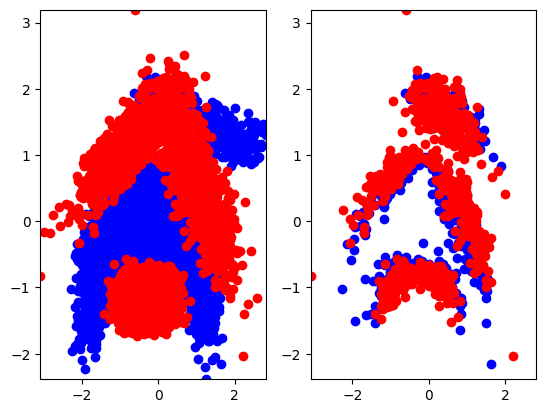

In [54]:
S = mi_CNN(X, y)  
Xreducida = X.loc[S]
yreducida = y.loc[S]
dibuja(X,y,Xreducida,yreducida,[-1,1])

In [55]:
# ! uv pip install imblearn

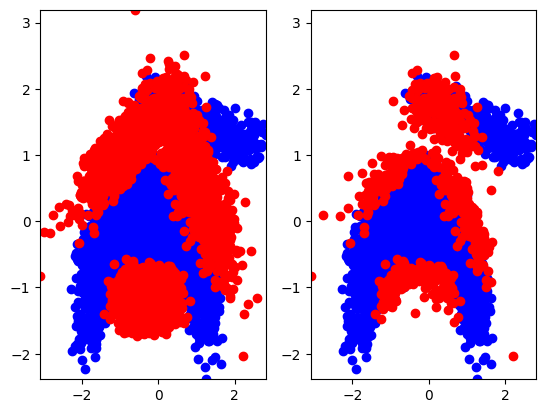

In [57]:
banana2 = banana.copy()
X2 = banana2.iloc[:,1:3]
y2 = banana2.iloc[:,0]
from imblearn.under_sampling import CondensedNearestNeighbour 
cnn = CondensedNearestNeighbour(sampling_strategy="not minority") 
Xreducida2, yreducida2 = cnn.fit_resample(X2, y2)
dibuja(X2,y2,Xreducida2,yreducida2,[-1,1])

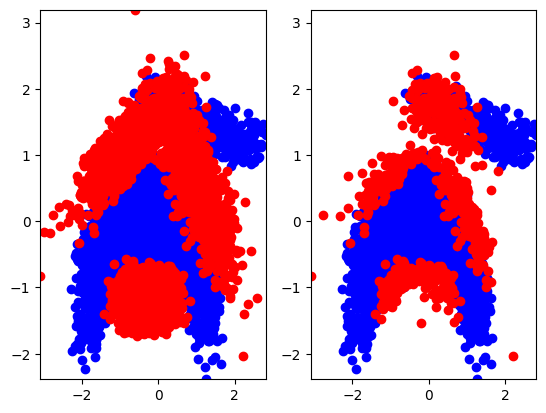

In [58]:
cnn = CondensedNearestNeighbour() 
Xreducida2, yreducida2 = cnn.fit_resample(X2, y2)
dibuja(X2,y2,Xreducida2,yreducida2,[-1,1])

Antes: 5,300 instancias
Después de ENN: 4,043 instancias (23.7% menos)
Distribución original:
 clase
-1.0    2924
 1.0    2376
Name: count, dtype: int64
Distribución tras ENN:
 clase
-1.0    2250
 1.0    1793
Name: count, dtype: int64


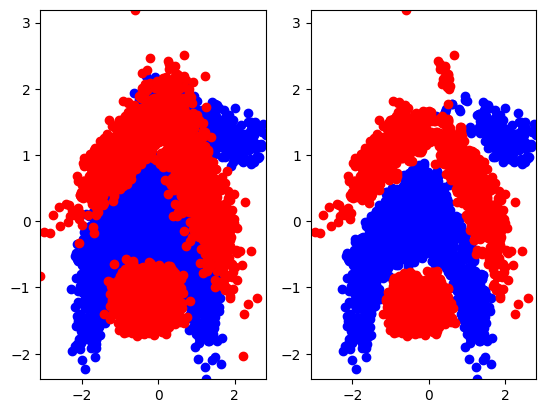

In [59]:

from imblearn.under_sampling import EditedNearestNeighbours

# --- ENN: edición por k vecinos ---
# n_neighbors=3 (clásico en ENN); 'all' limpia ambas clases
enn = EditedNearestNeighbours(
    sampling_strategy='all',   # o 'majority' si solo quieres limpiar la mayoritaria
    n_neighbors=3,
    kind_sel='all',            # mantener para compatibilidad (elige por mayoría)
    n_jobs=-1
)

Xreducida2_arr, yreducida2_arr = enn.fit_resample(X2, y2)

# Convertimos de ndarray -> pandas para que 'dibuja' funcione sin cambios
Xreducida2 = pd.DataFrame(Xreducida2_arr, columns=X2.columns)
yreducida2 = pd.Series(yreducida2_arr, name=y2.name)

# Resumen útil
print(f"Antes: {len(X2):,} instancias")
print(f"Después de ENN: {len(Xreducida2):,} instancias "
      f"({100*(1 - len(Xreducida2)/len(X2)):.1f}% menos)")

print("Distribución original:\n", y2.value_counts().sort_index())
print("Distribución tras ENN:\n", yreducida2.value_counts().sort_index())

# Visualización antes/después (usa tu función)
dibuja(X2, y2, Xreducida2, yreducida2, [-1, 1])


# Selección de características

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import pandas as pd

In [61]:
iris_filename = 'datasets-uci-iris.csv'
iris = pd.read_csv(iris_filename, sep=',', decimal='.', 
	header=None,names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target'])

In [62]:
sel = SelectKBest(chi2,k=2)
iris_reducido1 = sel.fit_transform(iris.iloc[:,0:4],iris.iloc[:,4])

print(sel.get_support())

[False False  True  True]


### RFECV

In [64]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd

iris_filename = 'datasets-uci-iris.csv'
iris = pd.read_csv(iris_filename, sep=',', decimal='.', 
	header=None,names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target'])

estimator = SVC(kernel="linear")
sel = RFECV(estimator, step=1, cv=5)
iris_reducido2 = sel.fit(iris.iloc[:,0:4],iris.iloc[:,4])
print(sel.ranking_)
print(sel.support_)
print("Numero de caracteristicas seleccionadas : %d" % sel.n_features_)

[1 1 1 1]
[ True  True  True  True]
Numero de caracteristicas seleccionadas : 4


In [65]:
grid_scores = sel.cv_results_["mean_test_score"]
print(grid_scores)

[0.94666667 0.96       0.96666667 0.98      ]


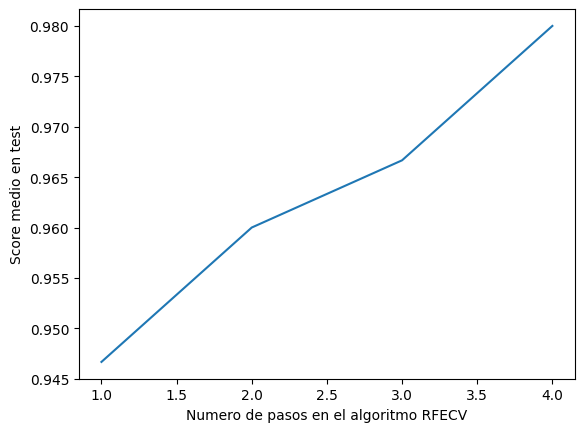

In [66]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Numero de pasos en el algoritmo RFECV")
plt.ylabel("Score medio en test")
plt.plot(range(1, len(grid_scores) + 1), grid_scores)
plt.show()


In [67]:
sonar_filename = 'sonar_csv.csv'
sonar = pd.read_csv(sonar_filename, sep=',', decimal='.')

estimator = SVC(kernel="linear")
sel = RFECV(estimator, step=1, cv=5)
sonar_reducido2 = sel.fit(sonar.iloc[:,:-1],sonar.iloc[:,-1])
print(sel.ranking_)
print(sel.support_)
print("Numero de caracteristicas seleccionadas : %d" % sel.n_features_)
print("Variables elegidas:",np.where(sel.support_))

[41 38 25  6  9 32 26 40 17  3  1  1 20 33 19  8 37 56 36 43  7 27 21 31
 35 28 55 22 13 29 12 51 44 34 53  2 15 16 23 24 46 30  4 11  1 10 14  5
 18 49 39 42 50 47 58 52 57 48 45 54]
[False False False False False False False False False False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False]
Numero de caracteristicas seleccionadas : 3
Variables elegidas: (array([10, 11, 44]),)


In [68]:
# print(sel.cv_results_)

[0.60116144 0.60046458 0.66852497 0.62996516 0.66817654 0.64912892
 0.62508711 0.62508711 0.6203252  0.62984901 0.64924506 0.62984901
 0.60603949 0.58675958 0.61080139 0.62555168 0.62090592 0.62555168
 0.62555168 0.62078978 0.62555168 0.6253194  0.61126597 0.59651568
 0.60638792 0.60150987 0.61114983 0.62078978 0.62055749 0.62055749
 0.62055749 0.61579559 0.62055749 0.63495935 0.63495935 0.63495935
 0.62520325 0.6300813  0.6300813  0.6300813  0.6300813  0.6300813
 0.6300813  0.6300813  0.6253194  0.6300813  0.6253194  0.6300813
 0.6300813  0.6300813  0.6253194  0.6253194  0.6253194  0.6253194
 0.6253194  0.6253194  0.6253194  0.6253194  0.6253194  0.6253194 ]


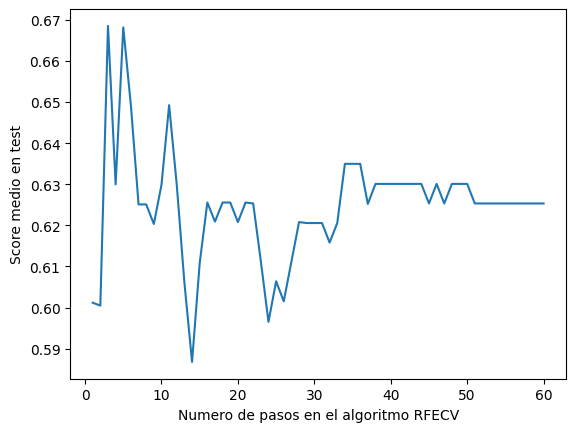

In [69]:
grid_scores = sel.cv_results_["mean_test_score"]
print(grid_scores)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Numero de pasos en el algoritmo RFECV")
plt.ylabel("Score medio en test")
plt.plot(range(1, len(grid_scores) + 1), grid_scores)
plt.show()

### Model selector

In [70]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

import pandas as pd
iris_filename = 'datasets-uci-iris.csv'
iris = pd.read_csv(iris_filename, sep=',', decimal='.', 
	header=None,names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target'])


In [71]:

# Clasificador basado en arboles de decision
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# X, y son las variables de entrada y de salida del dataset
X = iris.iloc[:,0:4]
y = iris.iloc[:,4]

forest.fit(X, y)
importances = forest.feature_importances_
print("importancias:",importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Variables ordenadas por importancia
print("Variables ordenadas:")

importancias: [0.09003677 0.06466106 0.40841285 0.43688931]
Variables ordenadas:


1. variable 3 (0.436889)
2. variable 2 (0.408413)
3. variable 0 (0.090037)
4. variable 1 (0.064661)


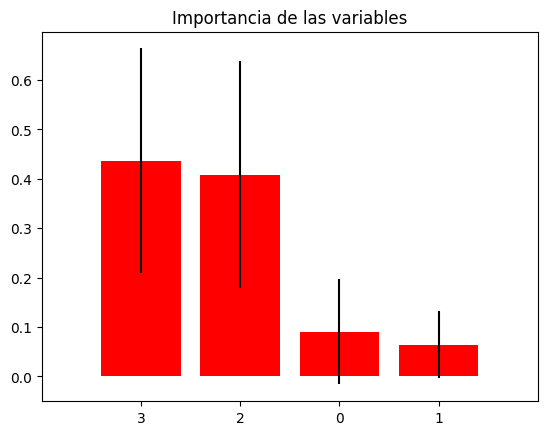

In [72]:

for f in range(X.shape[1]):
    print("%d. variable %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Grafico con las importancias de las variables
plt.figure()
plt.title("Importancia de las variables")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [73]:

#
# SONAR
#
sonar_filename = 'sonar_csv.csv'
sonar = pd.read_csv(sonar_filename, sep=',', decimal='.')


# X, y son las variables de entrada y de salida del dataset
X = sonar.iloc[:,:-1]
y = sonar.iloc[:,-1]


In [74]:

forest.fit(X, y)
importances = forest.feature_importances_
print("importancias:",importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Variables ordenadas por importancia
print("Variables ordenadas:")
for f in range(X.shape[1]):
    print("%d. variable %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


importancias: [0.01482066 0.01222625 0.0092784  0.01744842 0.01166064 0.01246314
 0.01020951 0.01510124 0.02695784 0.03082844 0.04286565 0.03994444
 0.02013632 0.01179317 0.01527309 0.01696127 0.01676699 0.01474921
 0.0113359  0.02303085 0.02689341 0.01519356 0.01555679 0.01277915
 0.01150307 0.01235432 0.01782416 0.02121588 0.01130552 0.01087536
 0.0160958  0.01216848 0.01277401 0.01542826 0.01519358 0.02822468
 0.02287946 0.0119213  0.01283066 0.01149263 0.01097411 0.01603789
 0.01985378 0.01918462 0.02616057 0.02022092 0.02184835 0.02256569
 0.02790377 0.00859624 0.01801176 0.01557593 0.01053925 0.01334909
 0.01133342 0.00927481 0.00897063 0.00858817 0.01321272 0.0094368 ]
Variables ordenadas:
1. variable 10 (0.042866)
2. variable 11 (0.039944)
3. variable 9 (0.030828)
4. variable 35 (0.028225)
5. variable 48 (0.027904)
6. variable 8 (0.026958)
7. variable 20 (0.026893)
8. variable 44 (0.026161)
9. variable 19 (0.023031)
10. variable 36 (0.022879)
11. variable 47 (0.022566)
12. vari

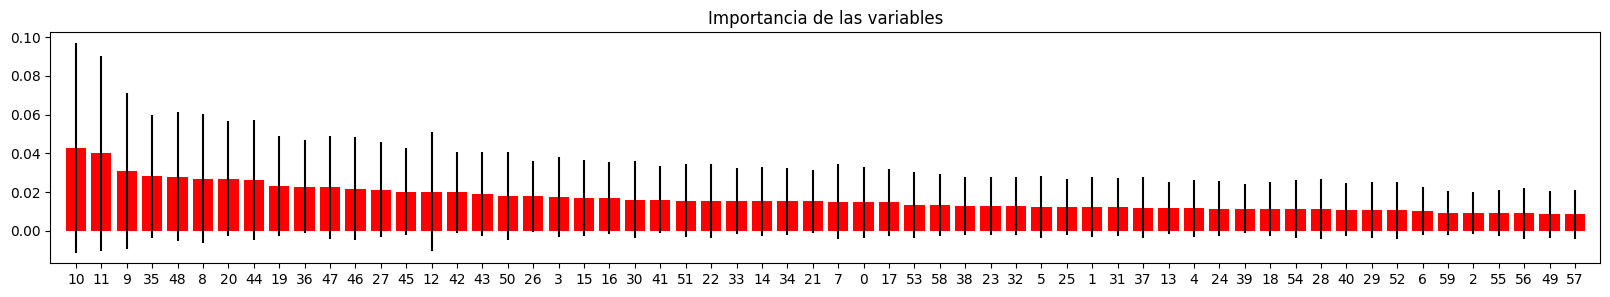

In [75]:
# Grafico con las importancias de las variables
plt.figure(figsize=(20,3))
plt.title("Importancia de las variables")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()